<a href="https://colab.research.google.com/github/NoeZGravity/IS403.N21.HTTT-Nhom9/blob/main/Dell_Seq2seq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/DataFiles/Project_dataset/DELL.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-03,15.457850,15.508366,15.194045,15.314722,14.699289,5804515
1,2017-01-04,15.356819,15.553269,15.356819,15.435399,14.815118,7486007
2,2017-01-05,15.379270,15.595366,15.379270,15.511173,14.887847,2956062
3,2017-01-06,15.586946,15.985460,15.536431,15.937751,15.297282,4745520
4,2017-01-09,15.833913,15.895654,15.617817,15.853558,15.216472,5008487


In [ ]:
#Preprocess data
data = data['Close'].values.reshape(-1, 1)

# Chuẩn hóa dữ liệu về khoảng [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split the data into train, test, and validation sets
train_size = int(len(data) * 0.7)
test_size = int(len(data) * 0.2)
valid_size = len(data) - train_size - test_size
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:train_size+test_size]
valid_data = scaled_data[train_size+test_size:]


# Tạo dữ liệu train và test theo định dạng Seq2Seq
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 7

train_X, train_Y = create_sequences(train_data, seq_length)
test_X, test_Y = create_sequences(test_data, seq_length)
valid_X, valid_Y = create_sequences(valid_data, seq_length)



In [ ]:
# Xây dựng mô hình Seq2Seq
model = Sequential()
model.add(LSTM(64, input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')


In [ ]:
# Huấn luyện mô hình
model.fit(train_X, train_Y, epochs=50, batch_size=32)
train_predict = model.predict(train_X)

Epoch 1/50
35/35 [==============================] - 3s 6ms/step - loss: 0.0259
Epoch 2/50
35/35 [==============================] - 0s 5ms/step - loss: 0.0020
Epoch 3/50
35/35 [==============================] - 0s 6ms/step - loss: 6.8820e-04
Epoch 4/50
35/35 [==============================] - 0s 5ms/step - loss: 6.7628e-04
Epoch 5/50
35/35 [==============================] - 0s 5ms/step - loss: 6.3435e-04
Epoch 6/50
35/35 [==============================] - 0s 6ms/step - loss: 6.2918e-04
Epoch 7/50
35/35 [==============================] - 0s 5ms/step - loss: 6.0292e-04
Epoch 8/50
35/35 [==============================] - 0s 6ms/step - loss: 5.9804e-04
Epoch 9/50
35/35 [==============================] - 0s 5ms/step - loss: 5.8366e-04
Epoch 10/50
35/35 [==============================] - 0s 6ms/step - loss: 5.7348e-04
Epoch 11/50
35/35 [==============================] - 0s 5ms/step - loss: 5.6514e-04
Epoch 12/50
35/35 [==============================] - 0s 5ms/step - loss: 5.7200e-04
Epoch 13/

In [ ]:
#Test mô hình
model.fit(test_X, test_Y, epochs=50, batch_size=32)
test_predict = model.predict(test_X)

Epoch 1/50
10/10 [==============================] - 0s 7ms/step - loss: 0.0013
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0017
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0015
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0013
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0010
Epoch 7/50
10/10 [==============================] - 0s 5ms/step - loss: 9.8524e-04
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 9.8577e-04
Epoch 9/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 10/50
10/10 [==============================] - 0s 5ms/step - loss: 0.0011
Epoch 11/50
10/10 [==============================] - 0s 6ms/step - loss: 9.5991e-04
Epoch 12/50
10/10 [==============================] - 0s 6ms/step - loss: 0.0011
Epoch 13/50
10/10 [==================

In [ ]:
#Validate the model
model.fit(valid_X, valid_Y, epochs=50, batch_size=32)
val_predict = model.predict(valid_X)

Epoch 1/50
5/5 [==============================] - 0s 7ms/step - loss: 5.6499e-04
Epoch 2/50
5/5 [==============================] - 0s 6ms/step - loss: 4.7686e-04
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 4.8013e-04
Epoch 4/50
5/5 [==============================] - 0s 6ms/step - loss: 4.8550e-04
Epoch 5/50
5/5 [==============================] - 0s 6ms/step - loss: 4.8046e-04
Epoch 6/50
5/5 [==============================] - 0s 6ms/step - loss: 4.6834e-04
Epoch 7/50
5/5 [==============================] - 0s 7ms/step - loss: 4.6535e-04
Epoch 8/50
5/5 [==============================] - 0s 6ms/step - loss: 4.6585e-04
Epoch 9/50
5/5 [==============================] - 0s 6ms/step - loss: 4.5998e-04
Epoch 10/50
5/5 [==============================] - 0s 6ms/step - loss: 4.5939e-04
Epoch 11/50
5/5 [==============================] - 0s 6ms/step - loss: 4.7183e-04
Epoch 12/50
5/5 [==============================] - 0s 6ms/step - loss: 4.8484e-04
Epoch 13/50
5/5 [========

In [ ]:
train_predict = model.predict(train_X)
train_predict= scaler.inverse_transform(train_predict)
test_predict = model.predict(test_X)
test_predict=scaler.inverse_transform(test_predict)
val_predict = model.predict(valid_X)
val_predict=scaler.inverse_transform(val_predict)



5/5 [==============================] - 0s 3ms/step


In [ ]:
# Tạo dữ liệu đầu vào cho dự đoán
last_7_days = valid_data[-7:]
next_7_days = []
next_7_days_scaled = []

# Dự đoán giá cổ phiếu trong 30 ngày tiếp theo
for i in range(7):
    input_data = np.array([last_7_days])
    input_data = np.reshape(input_data, (1, seq_length, 1))
    predicted_price = model.predict(input_data)
    next_7_days_scaled.append(predicted_price[0][0])
    next_7_days.append(scaler.inverse_transform(np.array(next_7_days_scaled[-1]).reshape(-1, 1))[0][0])
    last_7_days = np.append(last_7_days[1:], next_7_days_scaled[-1])

# In kết quả dự đoán
print("Predicted stock prices for the next 7 days:")
for i in range(7):
    print("Day {}: {}".format(i+1, next_7_days[i]))


1/1 [==============================] - 0s 23ms/step
Predicted stock prices for the next 7 days:
Day 1: 44.57841491699219
Day 2: 44.4510612487793
Day 3: 44.336090087890625
Day 4: 44.22841262817383
Day 5: 44.12247085571289
Day 6: 44.02296829223633
Day 7: 43.92741012573242


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Đưa giá trị thực tế về đơn vị gốc
test_data_original = scaler.inverse_transform(test_data)
valid_data_original = scaler.inverse_transform(valid_data)

# Chọn chỉ số phù hợp để tính toán các thông số đánh giá
test_data_original = test_data_original[:len(test_predict)]
valid_data_original = valid_data_original[:len(val_predict)]

# Tính các thông số đánh giá
mse_test = mean_squared_error(test_data_original, test_predict)
mse_valid = mean_squared_error(valid_data_original, val_predict)
mae_test = mean_absolute_error(test_data_original, test_predict)
mae_valid = mean_absolute_error(valid_data_original, val_predict)
rmse_test = np.sqrt(mse_test)
rmse_valid = np.sqrt(mse_valid)
r2_test = r2_score(test_data_original, test_predict)
r2_valid = r2_score(valid_data_original, val_predict)

# In kết quả
print("Testing MSE:", mse_test)
print("Validation MSE:", mse_valid)
print("Testing MAE:", mae_test)
print("Validation MAE:", mae_valid)
print("Testing RMSE:", rmse_test)
print("Validation RMSE:", rmse_valid)
print("Testing R-squared:", r2_test)
print("Validation R-squared:", r2_valid)


Testing MSE: 8.529159453986766
Validation MSE: 3.8588198621021568
Testing MAE: 2.0502013915624375
Validation MAE: 1.6467330533694602
Testing RMSE: 2.920472471020189
Validation RMSE: 1.9643879102922002
Testing R-squared: 0.6532474823657108
Validation R-squared: 0.48891687093174985


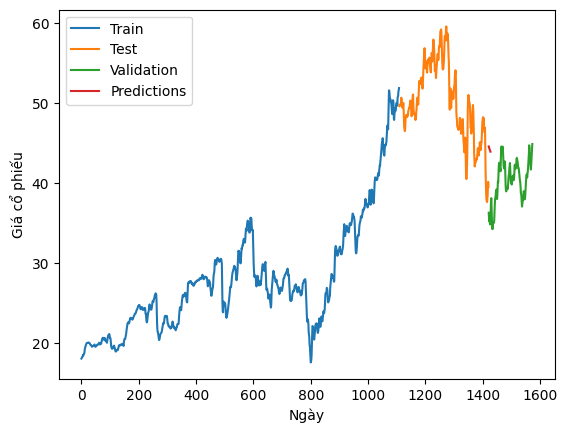

In [ ]:
import matplotlib.pyplot as plt

# Tạo mảng chứa các chỉ số ngày
train_index = range(len(train_predict))
test_index = range(len(train_predict), len(train_predict) + len(test_predict))
valid_index = range(len(train_predict) + len(test_predict), len(train_predict) + len(test_predict) + len(val_predict))
predict_index = range(len(train_predict) + len(test_predict), len(train_predict) + len(test_predict) + len(next_7_days))

# Vẽ biểu đồ
plt.plot(train_index, train_predict, label='Train')
plt.plot(test_index, test_predict, label='Test')
plt.plot(valid_index, val_predict, label='Validation')
plt.plot(predict_index, next_7_days, label='Predictions')
plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.legend()
plt.show()
